In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from slds.models.lgssm.model import *
from slds.models.lgssm.inference import *
from slds.models.lgssm.arma import ar2_lgssm

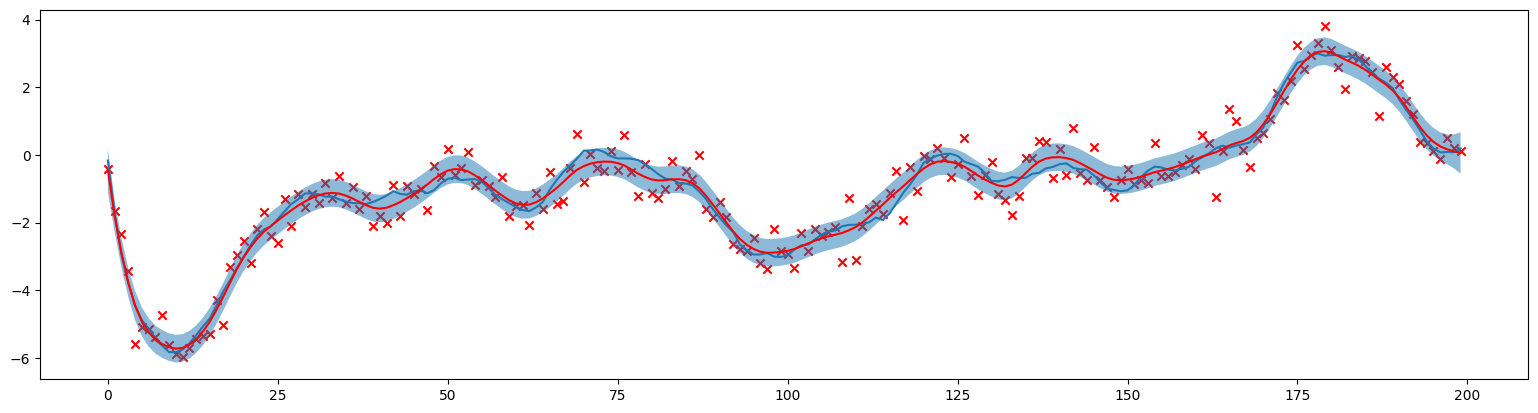

In [10]:
model = ar2_lgssm(alpha=.8, beta=.01, mu=.0, vz=.01, vz0=1., vx=.5**2)
T = 200

key = jax.random.PRNGKey(0)
z, x = lgssm_sample(key, model, T)

inference_state = lgssm_inference_init(model, x)
inference_state = lgssm_inference_update(inference_state)

posterior = lgssm_inference_posterior(inference_state)
state_m, state_V = vmap(gaussian_standardparams)(posterior.marginals.singletons)

# just plot first state dimension
mean = state_m[:,0]
sd = jnp.sqrt(state_V[:,0,0])

fig = plt.figure(figsize=[6.4*3, 4.8])
plt.plot(z[:,0])
plt.scatter(jnp.arange(0, x.shape[0]), x.squeeze(-1), marker='x', color='red')
plt.plot(mean, color='red')
plt.fill_between(jnp.arange(0, x.shape[0]), mean - 2*sd, mean + 2*sd, alpha=0.5);